# Back Propagation Neural Network on Mnist dataset

### report no.1 Reza Sahle, Alireza Rajabi

Backpropagation efficiently computes the gradient of the loss function with respect to the weights of the network for a single input-output example. This makes it feasible to use gradient methods for training multi-layer networks, updating weights to minimize loss; commonly one uses gradient descent or variants such as stochastic gradient descent

here we have 4200 samples that has labeled on 10 featuers,we used multi layer perceptrone and Back propagation learning role which help us to update our weights in each epochs to find the better acuuracy. to many epochs tends to overfitting, that in statistical we said low bias and high variance so we cant find a good model for test dataset, and low number of epochs mybe cant fit the model on our data and in other word it cause low variance and high bias, so we tried different number of epechs to find the best trade-off on bias and variance.

so what we done is sperate 1000 of them to train our Neural Network.

also we have other optimizing parameters such as learning rate (in our code shown as q) and momentum (shown as momen) and most of importance we have diffrent kinds of activation functions. ( here we uesd RelU, sigmoid and tanh).

#### first of all we import some librarys:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

In [5]:
label= pd.get_dummies(df['label'])

In [6]:
df = pd.concat([df,label],axis=1)

In [7]:
df.drop(['label'],inplace=True,axis=1)

In [8]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  0  1  2  3  4  5  6  7  8  9  
0       0  ...  0  1  0  0  0  0  0  0  0  0  
1       0  ...  1  0  0  0  0  0  0  0  0  0  
2       0  ...  0  1  0  0  0  0  0  0  0  0  
3       0  ...  0  0  0  0  1  0  0  0  0  0  
4       0  ...  1  0  0  0  0  0  0  0  0  0  

[5 rows x 794 columns]

#### we convert our dataframe into a matrix:

In [9]:
data=df.values

#### now we introduced our activation functions and their derivations

In [10]:
#activation function (sigmoid)
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [11]:
#derivation of activation function(sigmoid)
def der_sigmoid(x):
    return x * (1.0-x)

In [12]:
#activation function
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [13]:
def relu(X):
    return np.maximum(0,X)

In [14]:
def der_relu(X):
    return np.where(X <= 0,0,1)

#### we set 1000 samples for our training set:

In [15]:
#input layer
X_train = data[:1000,:784]
X_train.shape

(1000, 784)

In [16]:
#input layer
y_train = data[:1000,784:]
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### and 500 samples for our validation set:

In [17]:
#input layer
X_test = data[1000:1500,:784]
X_test.shape

(500, 784)

In [18]:
#input layer
y_test = data[1000:1500,784:]
y_test.shape

(500, 10)

#### here we initilized our weights. the weights that we generate are in interval of [-1,1]


#### and also we peresents number of neurons here

In [19]:
#weights for first and second layer
w1_1 = np.random.uniform(-1,1,(784,90))

In [20]:
wb1=np.random.uniform(0,1,(1,90))

In [21]:
#weights for second and third layer3
w2_2 = np.random.uniform(-1,1,(90,70))

In [22]:
wb2=np.random.uniform(0,1,(1,70))

In [23]:
#weights for third and fourth layer
w3_3 = np.random.uniform(-1,1,(70,10))

In [24]:
wb3=np.random.uniform(0,1,(1,10))

#### the momentum parameter will regularize the velocity of updating weights.

In [25]:
vel1=np.zeros_like(w1_1)

In [26]:
vel2=np.zeros_like(w2_2)

In [27]:
vel3=np.zeros_like(w3_3)

#### bias in every layer in theory should make the accuracy better, but here we reach the 93% accuracy without bias

In [28]:
b1=np.zeros((1000,1))+1

In [29]:
b2=np.zeros((1000,1))+1

In [30]:
b3=np.zeros((1000,1))+1

goal of this below 3 lines: since we make random weights, we cant say that our changes on parameter changes helping us, so we hold the values every time to make the results only related to our tuning parameters.

In [34]:
w1=np.copy(w1_1)
w2=np.copy(w2_2)
w3=np.copy(w3_3)

#### first we calculate the forward propagation then we copmutes the cost functions (witch is the mean squared error) and finally we calculate the back propagation.

In [35]:
lis = []
for i in range(3000):

    #forward propagation
    
    #second layer output with 3 neuron
    z2=np.dot(X_train,w1)+np.dot(b1,wb1)
    a2=sigmoid(z2)
    
    #third layer output with 2 neuron

    z3=np.dot(a2,w2)+np.dot(b2,wb2)
    a3=sigmoid(z3)

    
    #fourth layer(final layer) with 1 neuron

    z4=np.dot(a3,w3)+np.dot(b3,wb3)
    a4=sigmoid(z4)
    
    
    #Backpropagation
    
    #cost = (abs(y_train - a4)).mean()
    cost = 0.5 * (y_train - a4)**2
    lis.append(np.sum(cost))
    
    #print('train',i,':',np.sum(cost))
    #derviation of cost function for w3
    delta4= (y_train - a4) * (der_sigmoid(a4))
    gamma3=np.dot(a3.T,delta4)
    
    
    delta3 = np.dot(delta4,w3.T) * (der_sigmoid(a3))
    gamma2 = np.dot(a2.T,delta3)
    
    delta2 = np.dot(delta3,w2.T) * (der_sigmoid(a2))
    gamma1 = np.dot(X_train.T, delta2) 
    
    #updating the weights

    #learning rate
    q=0.3
    momen=0.1
    
    vel1=momen*vel1+q*(gamma1)
    vel2=momen*vel2+q*(gamma2)
    vel3=momen*vel3+q*(gamma3)
    
   # w3 += (q*(1/1000)*gamma3)
    w1= w1+(1/1000)*vel1
   # w2 += (q*(1/1000)*gamma2)
    w2= w2+(1/1000)*vel2
   # w1 += (q*(1/1000)*gamma1)
    w3= w3+(1/1000)*vel3


print('the prediction:\n',a4[:4])
print('\n the output:\n',y_train[:4])
print('the cost:\n',np.sum(cost))

the prediction:
 [[1.11845797e-03 9.09038152e-01 2.89547528e-01 9.95082953e-03
  8.23802797e-03 1.48123079e-02 7.05469913e-03 6.15255053e-03
  4.17135576e-02 3.95320015e-03]
 [9.74068821e-01 1.67792413e-03 8.23751329e-02 1.37828602e-02
  2.95059670e-03 2.10395710e-02 3.74419626e-02 6.67636513e-03
  5.37931253e-03 5.52380970e-04]
 [1.11204416e-02 9.38820668e-01 1.89211242e-02 5.38120620e-03
  1.49060949e-03 2.51895494e-02 1.28044506e-02 6.86571862e-02
  1.22278243e-02 1.71629963e-02]
 [1.72013871e-02 3.71015866e-03 2.19062137e-01 1.90663698e-03
  4.55995064e-02 1.54951108e-02 9.94330795e-02 3.78409074e-03
  2.54683963e-02 8.94607013e-03]]

 the output:
 [[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
the cost:
 154.2666795473991


#### validation forward propagation.

In [128]:
#forward propagation
    
#second layer output with 3 neuron
z2=np.dot(X_test,w1)

#use this only for tanh problem:
#(z2=(z2 - z2.min())/(z2.max() - z2.min()))

a2=sigmoid(z2)
    
#third layer output with 2 neuron

z3=np.dot(a2,w2)
a3=sigmoid(z3)

    
#fourth layer(final layer) with 1 neuron

z4=np.dot(a3,w3)
a4=sigmoid(z4)
    
    
#Backpropagation
    
#cost = (abs(y_train - a4)).mean()
cost = 0.5 * (y_test - a4)**2

#### since our outputs has a probable values we set them to unitary vectors such as below:

In [129]:
from numpy import linalg as LA

In [130]:
arr = np.zeros((a4.shape[0],a4.shape[1]))
for i in range(a4.shape[0]):
    for j in range(a4.shape[1]):
        if LA.norm(a4[i],np.inf)==a4[i,j]:
            arr[i,j]=1
        else:
            arr[i,j]=0
            
print(arr)


[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


#### to calculate the accuracy:

In [131]:
from sklearn.metrics import accuracy_score,classification_report

In [132]:
print(accuracy_score(y_test,arr))
print(classification_report(y_test,arr))

0.642
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        43
           1       0.78      0.95      0.86        61
           2       0.62      0.85      0.72        62
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        49
           5       0.53      0.57      0.55        49
           6       0.80      0.78      0.79        55
           7       0.60      0.78      0.68        49
           8       0.51      0.62      0.56        48
           9       0.51      0.69      0.59        49

   micro avg       0.64      0.64      0.64       500
   macro avg       0.52      0.61      0.56       500
weighted avg       0.54      0.64      0.58       500
 samples avg       0.64      0.64      0.64       500



#### mean squared error for train set:

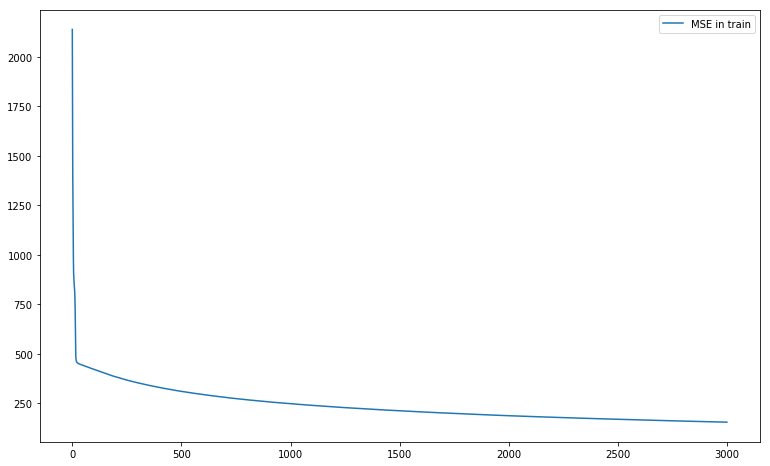

In [36]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.plot(range(0,3000),lis,label='MSE in train')
ax.legend(loc=0)